In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import os
from IPython.display import SVG

from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
np.random.seed(0)
import json

In [11]:
iris_data = pd.read_csv('C:\\Users\\fight\\Downloads\\train_iris.csv',  index_col=0)

In [13]:
test_iris_data = pd.read_csv('C:\\Users\\fight\\Downloads\\test_iris.csv',  index_col=0)

In [14]:
X = iris_data[['sepal length', 'sepal width', 'petal length', 'petal width']]
Y = iris_data.species
X_test = test_iris_data.drop('species', axis =1 )
Y_test = test_iris_data.species

In [15]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [16]:
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

[Text(2232.0, 1223.1, 'petal width <= 0.8\nentropy = 1.581\nsamples = 100\nvalue = [35, 30, 35]'),
 Text(1116.0, 951.3, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(3348.0, 951.3, 'petal width <= 1.75\nentropy = 0.996\nsamples = 65\nvalue = [0, 30, 35]'),
 Text(2232.0, 679.5, 'petal length <= 4.95\nentropy = 0.439\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(1116.0, 407.69999999999993, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(3348.0, 407.69999999999993, 'sepal length <= 6.5\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(2232.0, 135.89999999999986, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(4464.0, 135.89999999999986, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(4464.0, 679.5, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

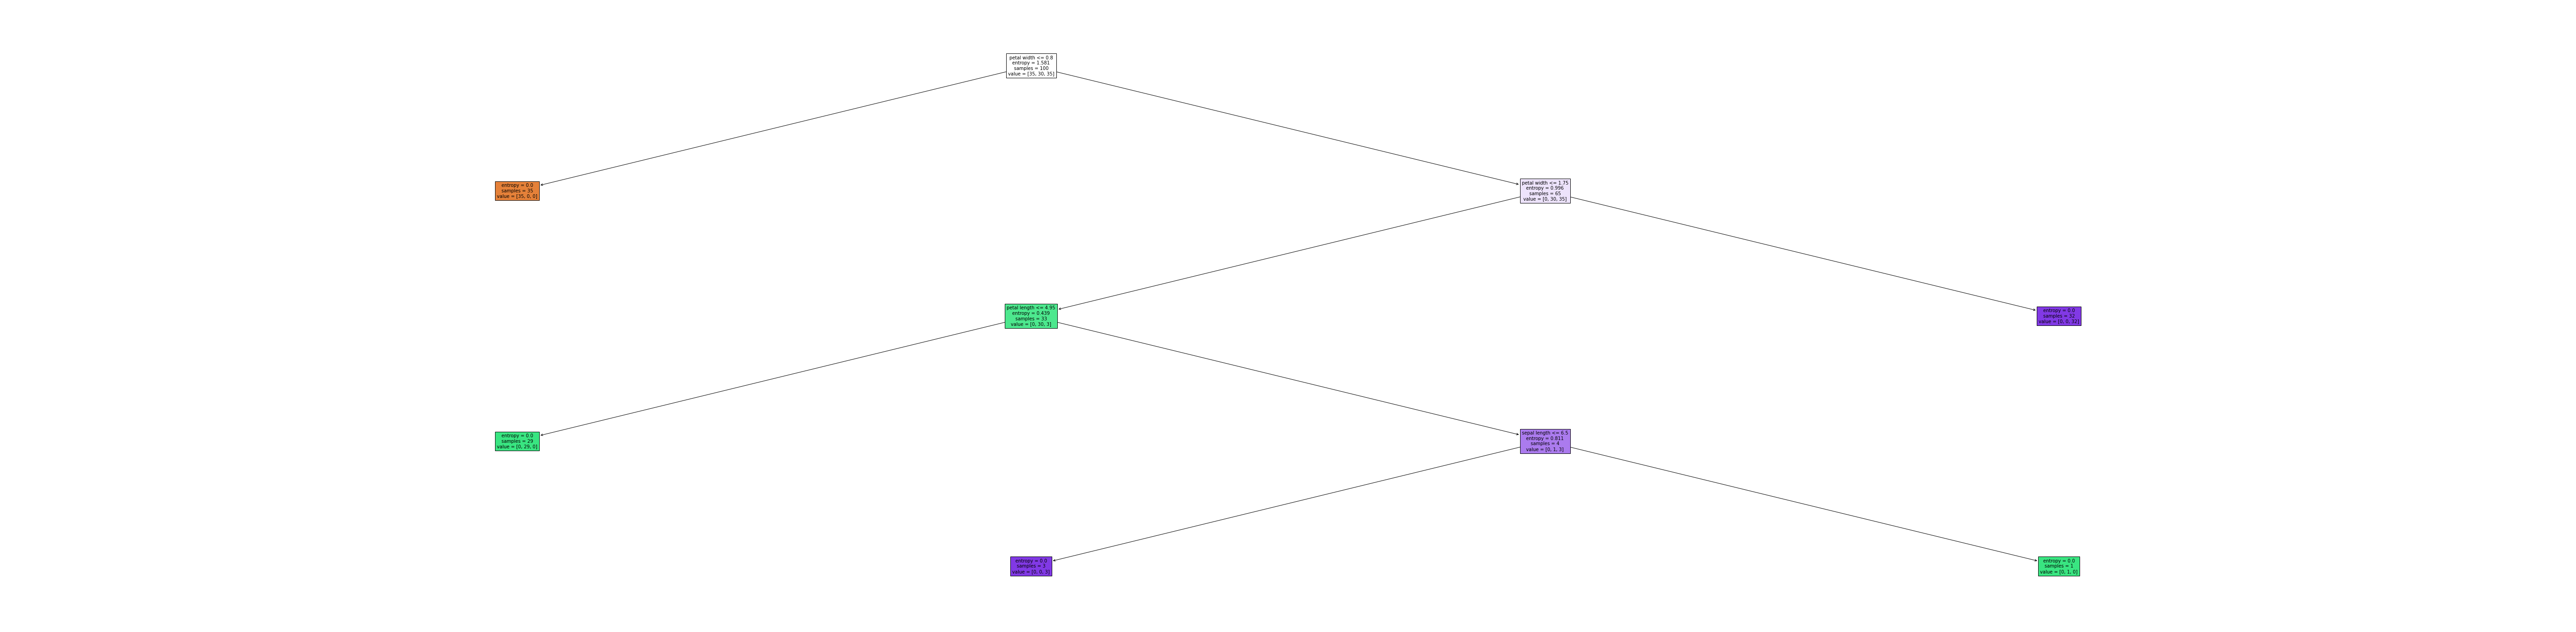

In [17]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [18]:
max_depth_values = range(1, 100)
scores = pd.DataFrame()


In [19]:
for max_depth in max_depth_values:
    clf =  tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X, Y)
    train_score = clf.score(X, Y)
    test_score = clf.score(X_test, Y_test)
    
    kek_mean_cross_val = cross_val_score(clf, X, Y, cv=5).mean()
    
    score_data = pd.DataFrame({'max_depth':[max_depth],\
                                'train_score':[train_score],\
                                'test_score':[test_score],\
                                'mean_cross_val':[kek_mean_cross_val]})
    scores = scores.append(score_data)
    
    
    

In [20]:
scores

,max_depth,train_score,test_score,mean_cross_val
0,1,0.70,0.60,0.70
0,2,0.97,0.94,0.95
0,3,0.99,0.94,0.96
0,4,1.00,0.94,0.96
0,5,1.00,0.94,0.96
...,...,...,...,...
0,95,1.00,0.92,0.96
0,96,1.00,0.92,0.96
0,97,1.00,0.94,0.96
0,98,1.00,0.92,0.96


In [21]:
scores_long = pd.melt(scores, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'mean_cross_val'], \
                      var_name='type', value_name='score')

In [22]:
scores_long

,max_depth,type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
292,95,mean_cross_val,0.96
293,96,mean_cross_val,0.96
294,97,mean_cross_val,0.96
295,98,mean_cross_val,0.96


<AxesSubplot:xlabel='max_depth', ylabel='score'>

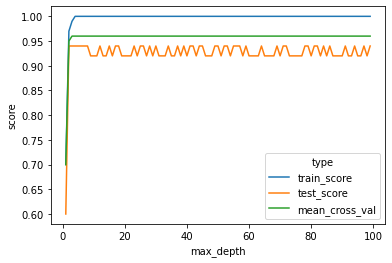

In [23]:
sns.lineplot(x='max_depth', y='score', hue='type', data=scores_long)

In [24]:
dogs_n_cats_test = pd.read_csv('C:\\Users\\fight\\Downloads\\dogs_n_cats.csv',encoding='cp1251')

In [25]:
dogs_n_cats_test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [33]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [34]:
X = dogs_n_cats_test.drop('Вид', axis = 1)
y = dogs_n_cats_test.Вид

In [35]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(279.0, 407.70000000000005, 'Длина <= 14.5\nentropy = 1.0\nsamples = 1000\nvalue = [500, 500]'),
 Text(139.5, 135.89999999999998, 'entropy = 0.0\nsamples = 500\nvalue = [500, 0]'),
 Text(418.5, 135.89999999999998, 'entropy = 0.0\nsamples = 500\nvalue = [0, 500]')]

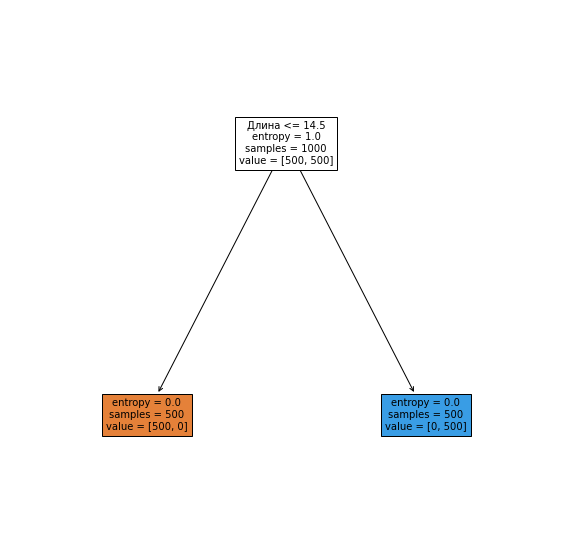

In [38]:
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [40]:
dogs_n_cats_test.columns

Index(['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям', 'Вид'], dtype='object')

In [42]:
dogs_n_cats_test_test = pd.read_json("C:\\Users\\fight\\Downloads\\dataset_209691_15.txt")

In [43]:
dogs_n_cats_test_test.columns

Index(['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям'], dtype='object')

In [49]:
result = clf.predict(dogs_n_cats_test_test)

In [50]:
pd.Series(result)[result == 'котик'].count()

42

In [46]:
dogs_n_cats_test_test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,24,28.8,1,1,0
1,28,33.6,1,1,0
2,31,37.2,1,1,0
3,26,31.2,1,1,0
4,33,39.6,1,0,0
...,...,...,...,...,...
95,8,3.2,1,0,1
96,9,3.6,1,0,1
97,9,3.6,1,0,1
98,10,4.0,1,0,1


In [2]:
clf = tree.DecisionTreeClassifier

In [ ]:
clf.fit(X_train, y_train)